# 综合案例 - 罗斯福国家森林树木类型识别

## 简介

数据来自于全球著名的数据科学竞赛平台Kaggle 。该数据包含来自科罗拉多州罗斯福国家森林的四个区域的树木观测数据。所有观测结果都是来自宽30米高30 米的森林区域制图数据，数据量超过50万条。我们需要根据树木观测数据构建出合理的模型来实现树木的类型识别。

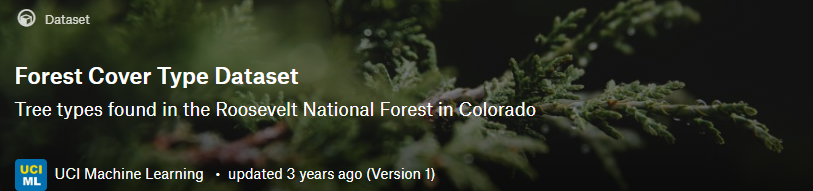

本案例将从问题出发，一步一步地领略机器学习的魅力。通关本案例，你将学会：

- 如何对数据进行探索
- 如何对数据进行可视化
- 如何分析数据
- 如何选择特征
- 如何构建机器学习模型来解决实际问题，并且识别准确率能高达90%

## 1. 初窥数据

### 任务描述

编写代码实现特征分布的可视化功能

### 相关操作

1. 认识数据
2. 查看数据的分布

### 操作步骤

####  1.1 认识数据

该数据是科罗拉多州罗斯国家森林区域树木类型的观测数据，我们需要**通过对这些数据进行处理分析，并构建出模型来实现树木类型识别的功能**。该数据中包含了多达55个字段，其中前54个字段为特征，最后一个字段为我们需要预测的**标签**。数据的字段名称与代表的意义如下所示：

| 字段名称  | 含义  |
| ------------ | ------------ |
| Elevation  | 海拔  |
| Aspec  | 方位角  |
| Slope  | 坡度  |
| Horizontal_Distance_To_Hydrology | 到最近的水源的水平距离 |
| Vertical_Distance_To_Hydrology | 到最近的水源的垂直距离  |
| Horizontal_Distance_To_Roadways  | 到最近的公路的水平距离 |
| Hillshade_9am | 早上9点时的山阴指数 |
| Hillshade_Noon | 中午12点时的山阴指数 |
| Hillshade_3pm  | 下午3点时的山阴指数  |
| Horizontal_Distance_To_Fire_Points |  到最近的营火地点的水平距离 |
| Wilderness_Area1 | 森林区域1 |
| Wilderness_Area2 | 森林区域2 |
| Wilderness_Area3 | 森林区域3 |
| Wilderness_Area4 | 森林区域4 |
| Soil_Type1 | 土壤类型1 |
| Soil_Type2 | 土壤类型2 |
| Soil_Type3 | 土壤类型3 |
| Soil_Type4 | 土壤类型4 |
| Soil_Type5 | 土壤类型5 |
| Soil_Type6 | 土壤类型6 |
| Soil_Type7 | 土壤类型7 |
| Soil_Type8 | 土壤类型8 |
| Soil_Type9 | 土壤类型9 |
| Soil_Type10 | 土壤类型10 |
| Soil_Type11 | 土壤类型11 |
| Soil_Type12 | 土壤类型12 |
| Soil_Type13 | 土壤类型13 |
| Soil_Type14 | 土壤类型14 |
| Soil_Type15 | 土壤类型15 |
| Soil_Type16 | 土壤类型16 |
| Soil_Type17 | 土壤类型17 |
| Soil_Type18 | 土壤类型18 |
| Soil_Type19 | 土壤类型19 |
| Soil_Type20 | 土壤类型20 |
| Soil_Type21 | 土壤类型21 |
| Soil_Type22 | 土壤类型22 |
| Soil_Type23 | 土壤类型23 |
| Soil_Type24 | 土壤类型24 |
| Soil_Type25 | 土壤类型25 |
| Soil_Type26 | 土壤类型26 |
| Soil_Type27 | 土壤类型27 |
| Soil_Type28 | 土壤类型28 |
| Soil_Type29 | 土壤类型29 |
| Soil_Type30 | 土壤类型30 |
| Soil_Type31 | 土壤类型31 |
| Soil_Type32 | 土壤类型32 |
| Soil_Type33 | 土壤类型33 |
| Soil_Type34 | 土壤类型34 |
| Soil_Type35 | 土壤类型35 |
| Soil_Type36 | 土壤类型36 |
| Soil_Type37 | 土壤类型37 |
| Soil_Type38 | 土壤类型38 |
| Soil_Type39 | 土壤类型39 |
| Soil_Type40 | 土壤类型40 |
| Cover_Type |树木类型(取值范围为1到7之间的整数)|

#### 查看数据的分布

数据的分布对于我们理解数据至关重要，所以当我们加载完数据之后，第一步应该看看数据中各个特征的分布是什么样子。

【案例实操】该数据的路径为`./input_data/forest_train.csv`,使用Pandas加载数据集并查看行数、特征名称及其数据类型：

In [1]:
import pandas as pd

train_df = pd.read_csv('./input_data/forest_train.csv')
train_df.info()1[pA]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406708 entries, 0 to 406707
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           406708 non-null  int64
 1   Aspect                              406708 non-null  int64
 2   Slope                               406708 non-null  int64
 3   Horizontal_Distance_To_Hydrology    406708 non-null  int64
 4   Vertical_Distance_To_Hydrology      406708 non-null  int64
 5   Horizontal_Distance_To_Roadways     406708 non-null  int64
 6   Hillshade_9am                       406708 non-null  int64
 7   Hillshade_Noon                      406708 non-null  int64
 8   Hillshade_3pm                       406708 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  406708 non-null  int64
 10  Wilderness_Area1                    406708 non-null  int64
 11  Wilderness_Area2                    406708 non-null 

从输出结果可以看出，训练数据集总共有大概40万条数据，所有特征的值都是整数，数据中没有缺失值。这对我们来说是一个好消息，因为我们不需要去处理缺失值了。

接下来我们可以看看数据的均值，标准差，分位数等大致信息了。

【案例实操】查看数据的统计描述信息：

In [3]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,406708.0,2959.669564,279.598928,1859.0,2810.0,2996.0,3163.0,3858.0
Aspect,406708.0,155.653818,111.836051,0.0,58.0,127.0,260.0,360.0
Slope,406708.0,14.100770,7.481663,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,406708.0,269.631556,212.551001,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,406708.0,46.388883,58.266762,-173.0,7.0,30.0,69.0,599.0
Horizontal_Distance_To_Roadways,406708.0,2351.095122,1558.532131,0.0,1106.0,1999.0,3330.0,7117.0
Hillshade_9am,406708.0,212.180400,26.753328,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,406708.0,223.344242,19.756017,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,406708.0,142.516021,38.239395,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,406708.0,1980.658681,1324.638407,0.0,1024.0,1710.0,2550.0,7173.0


从结果可以看出，区域和土壤类别是已经经过独热编码后的特征。这对于我们来说也是一个好消息，省去了独热编码的步骤。

接下来可以尝试看看某些特征的具体分布，例如想要查看海拔的分布。

【案例实操】使用直方图对海拔的分布进行可视化：

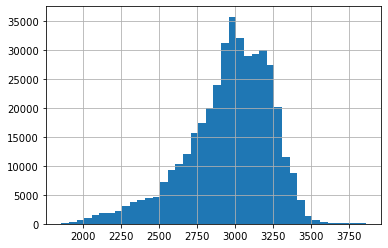

In [4]:
import matplotlib.pyplot as plt

train_df['Elevation'].hist(bins = 40)
plt.show()

可以看出海拔这个特征的分布比较接近正态分布，这也是符合常理的。因为可能森林公园中海拔低和海拔高的区域占少数，而海拔处于平均水平的区域占多数。

【案例实操】对树木类型`Cover_Type`的分布进行可视化，并将结果保存为`./output_data/forest_cover_type.jpg`

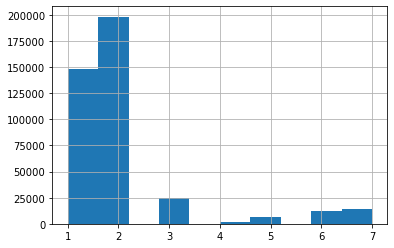

In [6]:
train_df['Cover_Type'].hist()

plt.savefig('./output_data/forest_cover_type.jpg')
plt.show()

## 2. 特征选择

### 任务描述

编写代码进行特征选择，以适合模型

### 相关知识

为了完成本任务，需要掌握特征选择的相关知识和方法

### 操作步骤

#### 2.1 特征选择

现在数据中总共有 54 个特征，但并不是所有的特征都对树木类型识别模型有帮助，所以我们需要看看哪些特征对我们有用。

在这里主要看看除了独热编码特征之外的特征与标签之间的关系，我们可以使用箱线图来实现。

【案例实操】对海拔对标签的影响进行可视化：

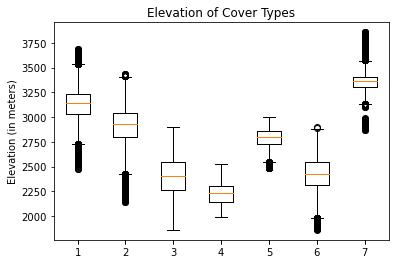

In [8]:
import matplotlib.pyplot as plt

spruce = train_df[train_df.Cover_Type == 1]
lodgepole = train_df[train_df.Cover_Type == 2]
ponderosa = train_df[train_df.Cover_Type == 3]
willow = train_df[train_df.Cover_Type == 4]
aspen = train_df[train_df.Cover_Type == 5]
douglas = train_df[train_df.Cover_Type == 6]
krummholz = train_df[train_df.Cover_Type == 7]

plt.figure()
plt.title('Elevation of Cover Types')
plt.ylabel('Elevation (in meters)')
data = [spruce.Elevation, lodgepole.Elevation, ponderosa.Elevation, willow.Elevation,
aspen.Elevation, douglas.Elevation, krummholz.Elevation]
plt.xticks([1, 2, 3, 4, 5, 6, 7])
plt.boxplot(data)
plt.show() 

现在我们暂时只需要看那些方框的位置即可，根据方框的位置可以看出海拔对于分辨树木类别有一定的用处，因为如果海拔比较低则很可能是4号类型的树木。当海拔比较高时很可能是7号类型的树木。总而言之，如果方块的分布越跌宕起伏对于识别树木就越有用处，越平坦就越没用。

【案例实操】分别绘制`Aspect`，`Slope`，`Horizontal_Distance_To_Hydrology`，`Vertical_Distance_To_Hydrology`，`Horizontal_Distance_To_Roadways`，`Hillshade_9am`，`Hillshade_Noon`，`Hillshade_3pm`，`Horizontal_Distance_To_Fire_Points`的箱线图

In [15]:
def boxplot_for(feature_name):
    plt.figure()
    plt.title('{} of Cover Types'.format(feature_name))
    plt.ylabel('{} (in meters)'.format(feature_name))
    data = [spruce[feature_name], lodgepole[feature_name], ponderosa[feature_name], willow[feature_name],
    aspen[feature_name], douglas[feature_name], krummholz[feature_name]]
    plt.xticks([1, 2, 3, 4, 5, 6, 7])
    plt.boxplot(data)
    plt.show() 

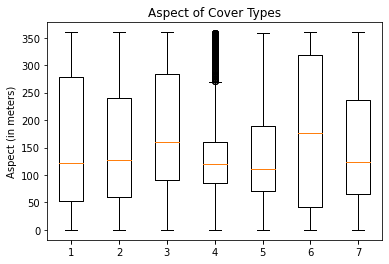

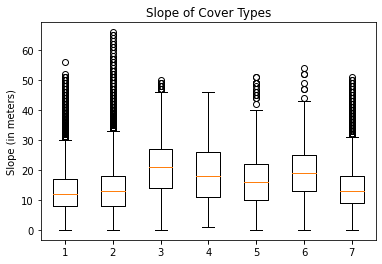

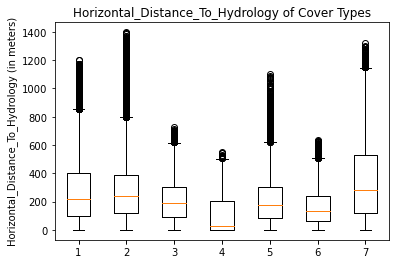

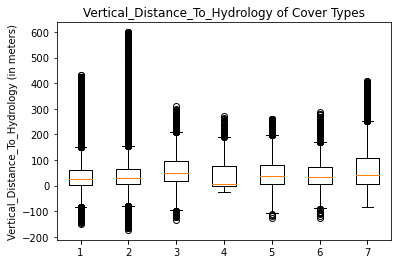

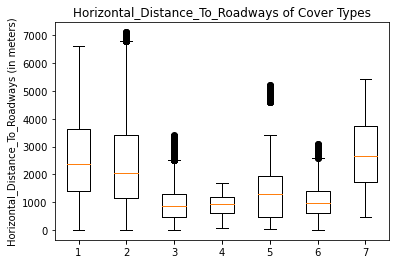

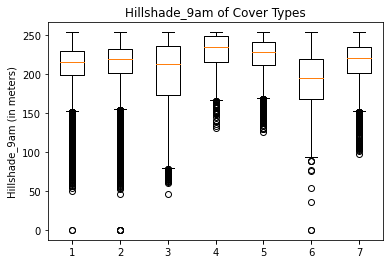

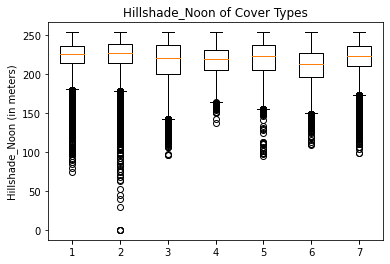

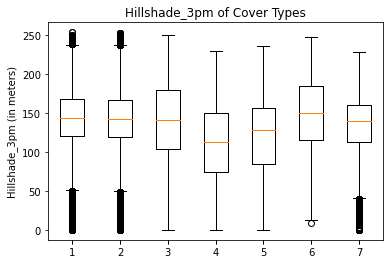

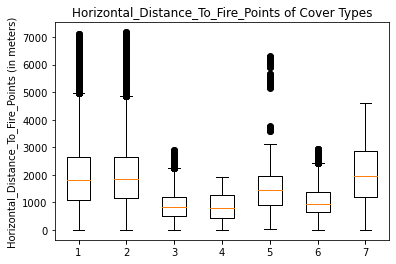

In [16]:
feature_names = ['Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
                 'Horizontal_Distance_To_Fire_Points']
for feature_name in feature_names:
    boxplot_for(feature_name)

从结果可以看出`Elevation`、`Slope`和`Horizontal_Distance_To_Roadways`对于识别树木类型更有帮助。

以上都是单特征对标签的影响，接下来我们看看特征与特征之间的相关性如何。一般来说，如果两个特征的相关性比较高，则可以将其中一个特征筛掉。因为如果两个相关性比较高的特征保留了下来，对于模型的训练会是一种负担，而且会称为一种噪声。所以在选择特征时，应该尽量**选择相关性比较低的特征**。

【案例实操】计算特征之间的相关性，并绘制其热力图：

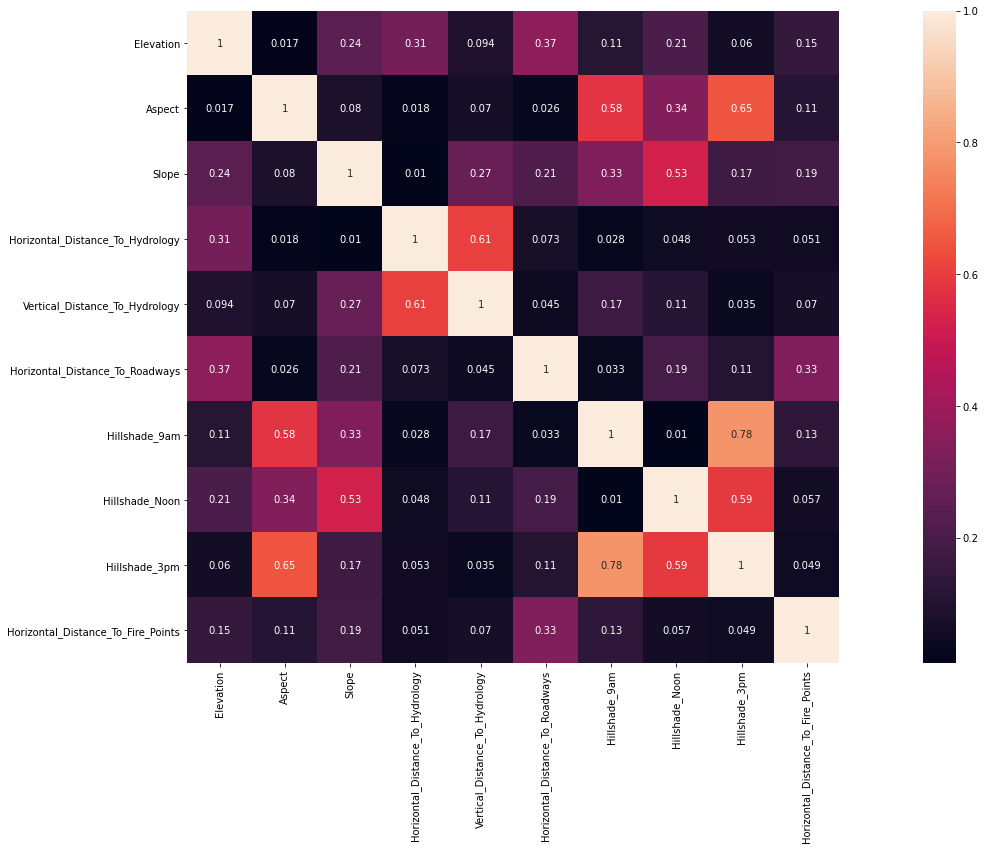

In [19]:
import seaborn as sns
corr_df=train_df.loc[:, 'Elevation':'Horizontal_Distance_To_Fire_Points'].corr()
corr_df1=abs(corr_df)

fig=plt.gcf()
fig.set_size_inches(30, 12)
sns.heatmap(data=corr_df1, square=True, annot=True, cbar=True)
plt.show()

从图可以看出`Hillshade_9am`与`Hillshade_3pm`还有`Aspect`与`Hillshade_3pm`这两对特征的相关性比较高。所以需要从中删掉一个特征。

【案例实操】将`train_df`中的`Hillshade_3pm`特征删掉，并输出删除之后`train_df`的前5行：

In [20]:
train_df = train_df.drop(['Hillshade_3pm'], axis=1)
train_df.head().T

,0,1,2,3,4
Elevation,3021,3121,2340,2769,2908
Aspect,326,67,122,93,247
Slope,5,12,18,32,10
Horizontal_Distance_To_Hydrology,210,67,85,319,391
Vertical_Distance_To_Hydrology,30,7,10,149,-67
Horizontal_Distance_To_Roadways,2919,2910,417,642,1146
Hillshade_9am,207,232,248,250,200
Hillshade_Noon,234,215,222,173,248
Horizontal_Distance_To_Fire_Points,6087,3082,1329,999,408
Wilderness_Area1,1,0,0,0,0


## 3. 树木类型识别

### 任务描述

编写代码识别树木类别。

### 相关操作

1. 构建模型实现树木识别

### 操作步骤

#### 3.1 构建模型实现树木识别

选择完特征之后，我们可以将数据喂给我们的分类器来对树木进行识别了。

【案例实操】使用随机森林分类器实现对树木的分类，并使用测试集对结果进行评估，输出分类的准确率。

In [24]:
from sklearn.ensemble import RandomForestClassifier
# 创建随机森林分类器
clf = RandomForestClassifier(n_estimators=10)
# 训练集
X_train = train_df.drop(['Cover_Type'], axis = 1)
y_train = train_df['Cover_Type']
# 训练模型
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
# 加载测试集数据
test_df = pd.read_csv('./input_data/forest_test.csv')
X_test = test_df.drop(['Cover_Type', 'Hillshade_3pm'], axis=1)
y_test = test_df['Cover_Type']

In [27]:
# 进行预测（分类）
y_pred = clf.predict(X_test)
y_pred[:5]

array([1, 5, 1, 1, 1])

In [28]:
# 评估
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print('分类的准确率为：{:.2f}'.format(acc))

分类的准确率为：0.94
